# Zadanie domowe -- interpolacja dwusześcienna

Interpolacja dwusześcienna, to podobnie jak w przypadku interpolacji dwuliniowej, rozszerzenie idei interpolacji jednowymiarowej na dwuwymiarową siatkę.
W trakcie jej obliczania wykorzystywane jest 16 pikseli z otoczenia (dla dwuliniowej 4).
Skutkuje to zwykle lepszymi wynikami - obraz wyjściowy jest bardziej gładki i z mniejszą liczbą artefaktów.
Ceną jest znaczny wzrost złożoności obliczeniowej (zostało to zaobserwowane podczas ćwiczenia).

Interpolacja dana jest wzorem:
\begin{equation}
I(i,j) = \sum_{i=0}^{3} \sum_{j=0}^{3} a_{ij} x^i y^j
\end{equation}

Zadanie sprowadza się zatem do wyznaczenia 16 współczynników $a_{ij}$.
W tym celu wykorzystuje się, oprócz wartość w puntach $A$ (0,0), $B$ (1 0), $C$ (1,1), $D$ (0,1) (por. rysunek dotyczący interpolacji dwuliniowej), także pochodne cząstkowe $A_x$, $A_y$, $A_{xy}$.
Pozwala to rozwiązać układ 16-tu równań.

Jeśli zgrupujemy parametry $a_{ij}$:
\begin{equation}
a = [ a_{00}~a_{10}~a_{20}~a_{30}~a_{01}~a_{11}~a_{21}~a_{31}~a_{02}~a_{12}~a_{22}~a_{32}~a_{03}~a_{13}~a_{23}~a_{33}]
\end{equation}

i przyjmiemy:
\begin{equation}
x = [A~B~D~C~A_x~B_x~D_x~C_x~A_y~B_y~D_y~C_y~A_{xy}~B_{xy}~D_{xy}~C_{xy}]^T
\end{equation}

To zagadnienie można opisać w postaci równania liniowego:
\begin{equation}
Aa = x
\end{equation}
gdzie macierz $A^{-1}$ dana jest wzorem:

\begin{equation}
A^{-1} =
\begin{bmatrix}
1& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0 \\
0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
-3&  3&  0&  0& -2& -1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
2& -2&  0&  0&  1&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0& -3&  3&  0&  0& -2& -1&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  2& -2&  0&  0&  1&  1&  0&  0 \\
-3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0& -3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0 \\
9& -9& -9&  9&  6&  3& -6& -3&  6& -6&  3& -3&  4&  2&  2&  1 \\
-6&  6&  6& -6& -3& -3&  3&  3& -4&  4& -2&  2& -2& -2& -1& -1 \\
2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0 \\
-6&  6&  6& -6& -4& -2&  4&  2& -3&  3& -3&  3& -2& -1& -2& -1 \\
4& -4& -4&  4&  2&  2& -2& -2&  2& -2&  2& -2&  1&  1&  1&  1 \\
\end{bmatrix}
\end{equation}

Potrzebne w rozważaniach pochodne cząstkowe obliczane są wg. następującego przybliżenia (przykład dla punktu A):
\begin{equation}
A_x = \frac{I(i+1,j) - I(i-1,j)}{2}
\end{equation}
\begin{equation}
A_y = \frac{I(i,j+1) - I(i,j-1)}{2}
\end{equation}
\begin{equation}
A_{xy} = \frac{I(i+1,j+1) - I(i-1,j) - I(i,j-1) + I(i,j)}{4}
\end{equation}

## Zadanie

Wykorzystując podane informacje zaimplementuj interpolację dwusześcienną.
Uwagi:
- macierz $A^{-1}$ dostępna jest w pliku *a_invert.py*
- trzeba się zastanowić nad potencjalnym wykraczaniem poza zakres obrazka (jak zwykle).

Ponadto dokonaj porównania liczby operacji arytmetycznych i dostępów do pamięci koniecznych przy realizacji obu metod interpolacji: dwuliniowej i dwusześciennej.

In [1]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/05_Resolution/'

fileNames = ["parrot.bmp", "ainvert.py"]
for fileName in fileNames:
  if not os.path.exists(fileName):
      r = requests.get(url + fileName, allow_redirects=True)
      open(fileName, 'wb').write(r.content)

import ainvert

!cat ainvert.py

import numpy as np

A_invert = np.array([
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
[-3,  3,  0,  0, -2, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
[2, -2,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
[0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
[0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
[0,  0,  0,  0,  0,  0,  0,  0, -3,  3,  0,  0, -2, -1,  0,  0],
[0,  0,  0,  0,  0,  0,  0,  0,  2, -2,  0,  0,  1,  1,  0,  0],
[-3,  0,  3,  0,  0,  0,  0,  0, -2,  0, -1,  0,  0,  0,  0,  0],
[0,  0,  0,  0, -3,  0,  3,  0,  0,  0,  0,  0, -2,  0, -1,  0],
[9, -9, -9,  9,  6,  3, -6, -3,  6, -6,  3, -3,  4,  2,  2,  1],
[-6,  6,  6, -6, -3, -3,  3,  3, -4,  4, -2,  2, -2, -2, -1, -1],
[2,  0, -2,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0],
[0,  0,  0,  0,  2,  0, -2,  0,  0,  0,  0,  0,  1,  0,  1,  0],
[-6,  6,  6, -6, -4, -2,  4,  2, -3,  3, -3,  3, -2, -1, -2,

In [2]:
import math

def BicubicInterpolation(image, scale_x, scale_y):
    original_width = image.shape[1]
    original_height = image.shape[0]

    new_width = round(original_width * scale_x)
    new_height = round(original_height * scale_y)

    result_image = np.zeros((new_height, new_width), dtype=np.float32)

    def get_pixel_value(i, j):
        i = min(max(i, 0), original_height - 1)
        j = min(max(j, 0), original_width - 1)
        return image[i, j].astype(np.float32)

    for i in range(new_width):
        for j in range(new_height):
            original_x = i / scale_x
            original_y = j / scale_y
            x = math.floor(original_x)
            y = math.floor(original_y)
            delta_x = original_x - x
            delta_y = original_y - y
            x_1 = x + 1
            y_1 = y + 1

            # Wartości w punktach A, B, C, D
            A = get_pixel_value(x, y)
            B = get_pixel_value(x_1, y)
            C = get_pixel_value(x_1, y_1)
            D = get_pixel_value(x, y_1)

            # pochodne cząstkowe A_x, A_y, A_xy
            A_x = (get_pixel_value(x + 1, y) - get_pixel_value(x - 1, y)) / 2
            A_y = (get_pixel_value(x, y + 1) - get_pixel_value(x, y - 1)) / 2
            A_xy = (get_pixel_value(x + 1, y + 1)
                - get_pixel_value(x - 1, y)
                - get_pixel_value(x, y - 1)
                + get_pixel_value(x, y)) / 4

            # pochodne cząstkowe B_x, B_y, B_xy
            B_x = (get_pixel_value(x_1 + 1, y) - get_pixel_value(x_1 - 1, y)) / 2
            B_y = (get_pixel_value(x_1, y + 1) - get_pixel_value(x_1, y - 1)) / 2
            B_xy = (get_pixel_value(x_1 + 1, y + 1)
                - get_pixel_value(x_1 - 1, y)
                - get_pixel_value(x_1, y - 1)
                + get_pixel_value(x_1, y)) / 4

            # pochodne cząstkowe C_x, C_y, C_xy
            C_x = (get_pixel_value(x_1 + 1, y_1) - get_pixel_value(x_1 - 1, y_1)) / 2
            C_y = (get_pixel_value(x_1, y_1 + 1) - get_pixel_value(x_1, y_1 - 1)) / 2
            C_xy = (get_pixel_value(x_1 + 1, y_1 + 1)
                - get_pixel_value(x_1 - 1, y_1)
                - get_pixel_value(x_1, y_1 - 1)
                + get_pixel_value(x_1, y_1)) / 4

            # pochodne cząstkowe D_x, D_y, D_xy
            D_x = (get_pixel_value(x + 1, y_1) - get_pixel_value(x - 1, y_1)) / 2
            D_y = (get_pixel_value(x, y_1 + 1) - get_pixel_value(x, y_1 - 1)) / 2
            D_xy = (get_pixel_value(x + 1, y_1 + 1)
                - get_pixel_value(x - 1, y_1)
                - get_pixel_value(x, y_1 - 1)
                + get_pixel_value(x, y_1)) / 4

            # Aa=x
            x = np.array([[A,B,D,C,A_x,B_x,D_x,C_x,A_y,B_y,D_y,C_y,A_xy,B_xy,D_xy,C_xy]]).T
            a = ainvert.A_invert @ x

            A = a.reshape((4, 4))
            delta_x_vec = np.array([[1, delta_x, delta_x**2, delta_x**3]])
            delta_y_vec = np.array([[1], [delta_y], [delta_y**2], [delta_y**3]])
            result_image[i, j] = (delta_x_vec @ A.T @ delta_y_vec)[0, 0]

    return result_image


In [3]:
import math

def BilinearInterpolation(image, scale_x, scale_y):
    original_width = image.shape[1]
    original_height = image.shape[0]

    new_width = round(original_width * scale_x)
    new_height = round(original_height * scale_y)

    result_image = np.zeros((new_height, new_width), dtype=image.dtype)

    for y in range(new_height):
        for x in range(new_width):
            original_x = x / scale_x
            original_y = y / scale_y

            # Współrzędne narożników
            i1 = math.floor(original_y)
            j1 = math.floor(original_x)
            i2 = min(i1 + 1, original_height - 1)
            j2 = min(j1 + 1, original_width - 1)

            # Jasności pikseli
            f_A = image[i1, j1]
            f_B = image[i1, j2]
            f_C = image[i2, j2]
            f_D = image[i2, j1]

            # Obliczenie części ułamkowej
            delta_x = original_x - j1
            delta_y = original_y - i1

            # Interpolacja pozioma
            f_AB = f_A * (1 - delta_x) + f_B * delta_x
            f_CD = f_D * (1 - delta_x) + f_C * delta_x

            # Interpolacja pionowa
            f_ABCD = f_AB * (1 - delta_y) + f_CD * delta_y

            result_image[y, x] = f_ABCD

    return result_image

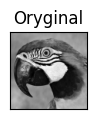

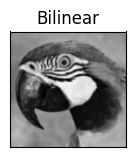

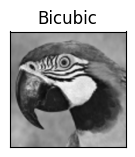

In [4]:
I = cv2.imread('parrot.bmp')
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(I.shape[0]/100,I.shape[1]/100))
plt.title("Oryginal")
plt.imshow(I, cmap ="gray")
plt.xticks([]), plt.yticks([])
plt.show()

scaled_image_1 = BilinearInterpolation(I, 1.5, 1.5)
plt.figure(figsize=(scaled_image_1.shape[1]/100, scaled_image_1.shape[0]/100))
plt.title("Bilinear")
plt.imshow(scaled_image_1, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.show()

scaled_image_2 = BicubicInterpolation(I, 1.5, 1.5)
plt.figure(figsize=(scaled_image_2.shape[1]/100, scaled_image_2.shape[0]/100))
plt.title("Bicubic")
plt.imshow(scaled_image_2, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.show()